In [53]:
import tensorflow as tf
import pathlib
from PIL import Image
import cv2     
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from tqdm import tqdm
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
%matplotlib inline
print(tf.__version__)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


In [59]:
data_train_root = r'./dataset/Animal/Cat&Dog/train'+'/*'
print(data_train_root)

./dataset/Animal/Cat&Dog/train/*


In [60]:
class_name=dict()
tag_name = {2:'other',1:"cat", 0:"dog"}

In [61]:
i = 0
train_images = list()
train_labels = list()
from tensorflow.keras.preprocessing.image import img_to_array,array_to_img
for img_path in glob(data_train_root):
    img = load_img(str(img_path),target_size=[224, 224])
    arr = img_to_array(img)
    new_img = array_to_img(arr)
    train_images.append(arr)
    if 'dog' in img_path:
        train_labels.append(0)
    elif 'cat' in img_path:
        train_labels.append(1)
    else:
        train_labels.append(2)

In [62]:
print(len(train_images))
print(len(train_labels))

25000
25000


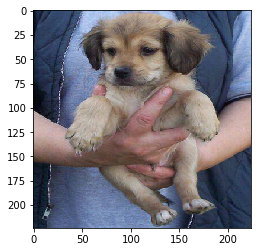

In [63]:
plt.imshow(array_to_img(train_images[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


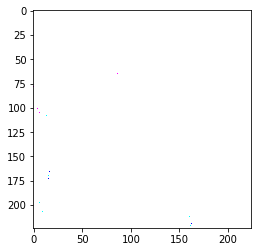

In [64]:
plt.imshow(train_images[0])

In [65]:
train_images = np.array(train_images,dtype=float)
train_labels = np.array(train_labels)

In [66]:
print(train_labels)

[0 1 0 ... 0 1 1]


In [67]:
print(train_images.shape)
print(train_labels.shape)

(25000, 224, 224, 3)
(25000,)


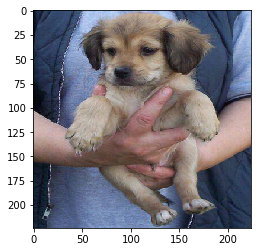

In [68]:
#print(train_images[0])
new = array_to_img(train_images[0])
plt.imshow(new)
#plt.imshow(train_images[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


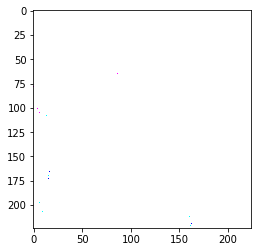

In [69]:
plt.imshow(train_images[0])

In [70]:
model = tf.keras.Sequential(
[
    layers.Flatten(input_shape=[224, 224,3]),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
    
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [71]:
model.fit(train_images, train_labels, epochs=5,shuffle=True)

Train on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 148s 6ms/sample - loss: 2988.4079 - accuracy: 0.5360
Epoch 2/5
12832/25000 [==============>...............] - ETA: 1:26 - loss: 1597.9348 - accuracy: 0.5469

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-71-bb0f1e62343c>", line 1, in <module>
    model.fit(train_images, train_labels, epochs=5,shuffle=True)
  File "/usr/local/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training.py", line 728, in fit
    use_multiprocessing=use_multiprocessing)
  File "/usr/local/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_v2.py", line 324, in fit
    total_epochs=epochs)
  File "/usr/local/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_v2.py", line 123, in run_one_epoch
    batch_outs = execution_function(iterator)
  File "/usr/local/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_v2_utils.py", line 86, in execution_function
    distributed_function(input_fn))
  File "/usr/local/lib/python3.7

KeyboardInterrupt: 

In [62]:
data_test_root = r'./dataset/Animal/Cat&Dog/test'+'/*.jpg'
print(data_test_root)

./dataset/Animal/Cat&Dog/test/*.jpg


In [47]:
test_images = list()
test_labels = list()
for img_path in glob(data_test_root):
    img = load_img(str(img_path),target_size=[224, 224])
    arr = img_to_array(img)
    new_img = array_to_img(arr)
    test_images.append(arr)

./dataset/Images/8.jpg
./dataset/Images/9.jpg
./dataset/Images/14.jpg
./dataset/Images/15.jpg
./dataset/Images/17.jpg
./dataset/Images/12.jpg
./dataset/Images/16-good.jpg
./dataset/Images/29-good.jpg
./dataset/Images/28-good.jpg
./dataset/Images/13.jpg
./dataset/Images/39.jpg
./dataset/Images/11.jpg
./dataset/Images/10.jpg
./dataset/Images/38.jpg
./dataset/Images/21.jpg
./dataset/Images/35.jpg
./dataset/Images/30-good.jpg
./dataset/Images/34.jpg
./dataset/Images/36.jpg
./dataset/Images/22.jpg
./dataset/Images/23.jpg
./dataset/Images/37.jpg
./dataset/Images/33.jpg
./dataset/Images/27.jpg
./dataset/Images/32.jpg
./dataset/Images/26-good.jpg
./dataset/Images/18.jpg
./dataset/Images/24.jpg
./dataset/Images/31.jpg
./dataset/Images/25.jpg
./dataset/Images/19.jpg
./dataset/Images/4.jpg
./dataset/Images/20-good.jpg
./dataset/Images/5.jpg
./dataset/Images/7.jpg
./dataset/Images/6.jpg
./dataset/Images/2.jpg
./dataset/Images/3.jpg
./dataset/Images/1.jpg


In [48]:
test_images = np.array(test_images,dtype=float)
test_labels = np.array(test_labels)

In [49]:
print(train_images.shape)
print(train_labels.shape)

(39, 224, 224, 3)
(39,)


In [50]:
#model.evaluate(test_images, test_labels)

In [51]:
predictions = model.predict(test_images)

In [52]:
print(predictions[0])
print(np.argmax(predictions[:10]))
test_labels = list(test_labels)
print(test_labels)
k = 0
for i in range(len(predictions)):
    w = np.argmax(predictions[i])
    print(k+1,w)
    #print(k,np.argmax(predictions[i]))
    k+=1

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1
[]
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 1
26 1
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 1
35 1
36 1
37 1
38 1
39 1


In [ ]:
print(tag_name)

In [ ]:
predictions_2 = model.predict(train_images)

In [ ]:
print(len(predictions_2))

In [ ]:
k = 0
train_test_labels = list()
for i in range(len(predictions_2)):
    train_test_labels.append(np.argmax(predictions[i]))
    print(k,train_labels[i],np.argmax(predictions[i]))
    if k == 50:
        break
    k+=1

In [ ]:
train_test_labels = np.array(train_test_labels)
model.evaluate(train_images[:50],train_test_labels[:50])